Random Forest

In [1]:
import os
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.model_selection import StratifiedShuffleSplit

import utils
import metrics
import data_tools

To estimate quality of model I will use:<br>
mean_average_error (mae)<br>
weighted_mae<br>
balanced_accuracy<br>
confusion matrix<br>

In [2]:
seed = 1528
path2data = os.path.join('..', 'data', 'winequality-white.csv')
data =  data_tools.Data(path2data, seed)
x_train, y_train, x_test, y_test = data.get_train_test()
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
weighted_mae_scorer = make_scorer(metrics.weighted_mae, greater_is_better=False, class_weights=data.class_weights)
balanced_accuracy_scorer = make_scorer(metrics.balanced_accuracy_score, greater_is_better=True)

I will choose parameters of RandomForestRegressor (n_estimators, max_depth, min_samples_split) using GridSearchCV with StratifiedShuffleSplit

In [3]:
model = GridSearchCV(RandomForestRegressor(criterion='mse', random_state=seed),
                     param_grid={'n_estimators': [2, 5, 10, 20],
                                 'max_depth': [5, 10, 20, 40],
                                 'min_samples_split': [2, 10, 20]}, 
                     scoring=balanced_accuracy_scorer,
                     cv=StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=seed),
                     n_jobs=-1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred_train = model.predict(x_train)
print("Best: %f using %s" % (model.best_score_, model.best_params_))
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']
params = model.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.237200 using {'max_depth': 40, 'min_samples_split': 10, 'n_estimators': 5}
0.224969 (0.017166) with: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 2}
0.223146 (0.010356) with: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 5}
0.223215 (0.009601) with: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 10}
0.221462 (0.006732) with: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 20}
0.222685 (0.013703) with: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 2}
0.223859 (0.011074) with: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 5}
0.220511 (0.007283) with: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 10}
0.222960 (0.008919) with: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 20}
0.219968 (0.013326) with: {'max_depth': 5, 'min_samples_split': 20, 'n_estimators': 2}
0.223843 (0.010493) with: {'max_depth': 5, 'min_samples_split': 20, 'n_estimators': 5}
0.219695 (0.006125) with: {'max_depth': 5, 'min

Max_depth=5 is not enough.<br>
n_estimators<=5 is not enough.


Train
MAE: 0.338836
Weighted MAE: 0.7533
Balanced accuracy score: 0.4544

Test
MAE: 0.583877
Weighted MAE: 1.3019
Balanced accuracy score: 0.2343
Confusion matrix:
 [[  0   0   2   4   0   0   0]
 [  0   4  29  12   1   0   0]
 [  0   4 186 149  14   0   0]
 [  0   0 110 341  86   0   0]
 [  0   0   6 120  81   0   0]
 [  0   0   0  20  19   0   0]
 [  0   0   0   1   0   0   0]]


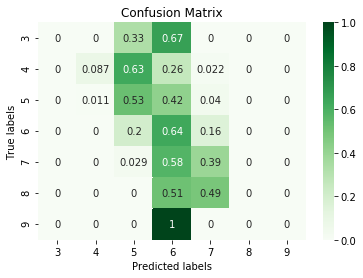

In [4]:
utils.print_metrics("Train", y_train, y_pred_train, data.classes, data.class_weights, draw_conf_matrix=False)
utils.print_metrics("Test", y_test, y_pred, data.classes, data.class_weights, draw_conf_matrix=True)

Try weighted_mae_scorer

Best: -1.371284 using {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 30}
-1.408460 (0.049680) with: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 10}
-1.393302 (0.043283) with: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 20}
-1.382672 (0.047122) with: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 30}
-1.402136 (0.052821) with: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 10}
-1.389671 (0.039219) with: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 20}
-1.382063 (0.045633) with: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 30}
-1.411322 (0.041867) with: {'max_depth': 10, 'min_samples_split': 20, 'n_estimators': 10}
-1.394680 (0.034069) with: {'max_depth': 10, 'min_samples_split': 20, 'n_estimators': 20}
-1.389512 (0.040816) with: {'max_depth': 10, 'min_samples_split': 20, 'n_estimators': 30}
-1.396358 (0.039191) with: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 10}
-1.377924 (0.040036)

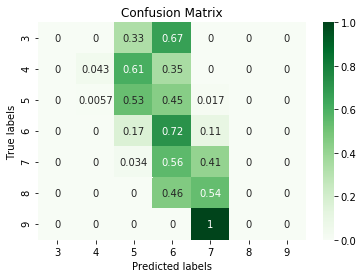

In [5]:
model = GridSearchCV(RandomForestRegressor(criterion='mse', random_state=seed),
                     param_grid={'n_estimators': [10, 20, 30],
                                 'max_depth': [10, 20, 40],
                                 'min_samples_split': [2, 10, 20]}, 
                     scoring=weighted_mae_scorer,
                     cv=StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=seed),
                     n_jobs=-1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred_train = model.predict(x_train)
print("Best: %f using %s" % (model.best_score_, model.best_params_))
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']
params = model.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
utils.print_metrics("Train", y_train, y_pred_train, data.classes, data.class_weights, draw_conf_matrix=False)
utils.print_metrics("Test", y_test, y_pred, data.classes, data.class_weights, draw_conf_matrix=True)

Save best model

In [6]:
from joblib import dump
dump(model, os.path.join('..', 'models', 'rf.joblib'))

['..\\models\\rf.joblib']

In [7]:
print("Feature importances")
for cn, fi in zip(data.column_names, model.best_estimator_.feature_importances_):
    print('%s: %.4f' % (cn, fi))

Feature importances
fixed acidity: 0.0675
volatile acidity: 0.1249
citric acid: 0.0491
residual sugar: 0.0613
chlorides: 0.0655
free sulfur dioxide: 0.1182
total sulfur dioxide: 0.0676
density: 0.0597
pH: 0.0711
sulphates: 0.0642
alcohol: 0.2508


Citric acid has the least importance.